# Getting comfortable with vectors and their operations

In [1]:
import numpy as np

#creation of vectors
a= np.array([1,2])
b= np.array([2,3])

#Addition of vectors
print("Addition:", a + b)

#Dot product of vectors
print("Dot Product:", np.dot(a,b))

#Magnitude of vectors
print("Magnitude of a:", np.linalg.norm(a))


Addition: [3 5]
Dot Product: 8
Magnitude of a: 2.23606797749979


# Manual Cosine Similarity

- Its nothing but the angle between vectors.
- We calculate that by using this:
    If we want cosine similarity b/w a,b, 
    then we find: a.b/|a|*|b|

In [3]:
#cosine similarity
angle= np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
print("Cosine Similarity:", angle)

def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

u1 = np.array([4, 5, 0, 2])
u2 = np.array([5, 0, 0, 3])
u3 = np.array([0, 4, 5, 1])

print("Cosine Similarity b/w u1&u2 is:", cosine_similarity(u1,u2))
print("Cosine Similarity b/w u1&u3 is:", cosine_similarity(u1,u3))
print("Cosine Similarity b/w u2&u3 is:", cosine_similarity(u2,u3))

Cosine Similarity: 0.9922778767136677
Cosine Similarity b/w u1&u2 is: 0.6647029903343876
Cosine Similarity b/w u1&u3 is: 0.5060480768510597
Cosine Similarity b/w u2&u3 is: 0.07938841860374447


# Mini movie recommendation system

In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

ratings = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 4, 0],
    [0, 2, 4, 0]
], dtype=float)

sim = cosine_similarity(ratings)
print("User-User Similarity Matrix:\n", sim)

User-User Similarity Matrix:
 [[1.         0.86091606 0.31872763 0.22677868]
 [0.86091606 1.         0.22866478 0.        ]
 [0.31872763 0.22866478 1.         0.9486833 ]
 [0.22677868 0.         0.9486833  1.        ]]


In [6]:
target_user = 0
target_movie = 2  # missing rating

# Weighted average of similar users
numerator = 0
denominator = 0

for other_user in range(ratings.shape[0]):
    if other_user == target_user or ratings[other_user, target_movie] == 0:
        continue
    numerator += sim[target_user, other_user] * ratings[other_user, target_movie]
    denominator += abs(sim[target_user, other_user])

predicted_rating = numerator / denominator
print(f"Predicted rating for User{target_user+1} on Movie{target_movie+1}: {predicted_rating:.2f}")

Predicted rating for User1 on Movie3: 4.00


# Visual intution

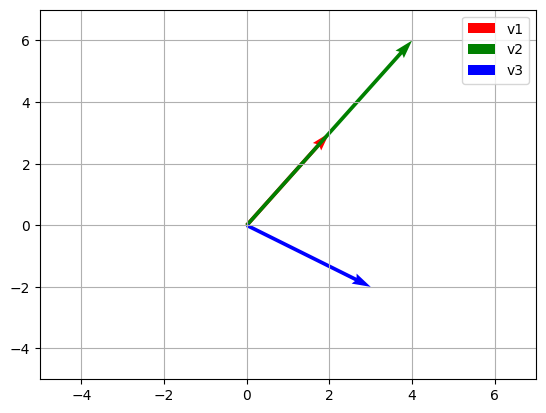

In [7]:
import matplotlib.pyplot as plt

v1 = np.array([2, 3])
v2 = np.array([4, 6])
v3 = np.array([3, -2])

plt.quiver(0,0,v1[0],v1[1],angles='xy',scale_units='xy',scale=1,color='r',label='v1')
plt.quiver(0,0,v2[0],v2[1],angles='xy',scale_units='xy',scale=1,color='g',label='v2')
plt.quiver(0,0,v3[0],v3[1],angles='xy',scale_units='xy',scale=1,color='b',label='v3')

plt.xlim(-5,7)
plt.ylim(-5,7)
plt.grid()
plt.legend()
plt.show()


# Challenge

Given two users:

U1 = [5, 3, 0, 1]

U2 = [1, 0, 4, 5]

1️⃣ Compute cosine similarity.
2️⃣ Find which movies are most different.
3️⃣ Predict if they’d like each other’s top movies.

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
u1= np.array([5,3,0,1])
u2= np.array([1,0,4,5])

#1️⃣ Compute cosine similarity.
sim= cosine_similarity([u1],[u2])
print("Cosine Similarity between U1 and U2:", sim[0][0])

#2️⃣ Find which movies are most different.
diff = np.abs(u1 - u2)
most_diff_movie = np.argmax(diff)
print("Most different movie index (0-based):", most_diff_movie)

#3️⃣ Predict if they’d like each other’s top movies.
u1_top_movie = np.argmax(u1)
u2_top_movie = np.argmax(u2)
u1_likes_u2_top = u1[u2_top_movie] >= 4
u2_likes_u1_top = u2[u1_top_movie] >= 4
print(f"Would U1 like U2's top movie? {'Yes' if u1_likes_u2_top else 'No'}")
print(f"Would U2 like U1's top movie? {'Yes' if u2_likes_u1_top else 'No'}")

Cosine Similarity between U1 and U2: 0.26082026547865056
Most different movie index (0-based): 0
Would U1 like U2's top movie? No
Would U2 like U1's top movie? No


# Reflection

- What is the geometric meaning of dot product?
    The dot product measures how much two vectors point in the same direction. Geometrically, it is the length of the projection of one vector onto another, scaled by the magnitude of the second vector. A larger value means they are more aligned.

- How does cosine similarity change if we scale a vector by 10?
    It doesn't change at all. Cosine similarity only cares about the angle (direction) between vectors, not their length (magnitude). Scaling a vector just makes it longer but doesn't change its direction, so the angle and the similarity score remain the same.

- Why is normalization important in recommendations?
    Normalization puts all features on a common scale, ensuring fair comparisons. This prevents features with large raw values (like view counts) from unfairly dominating features with smaller values (like 1-5 star ratings), leading to more accurate and balanced recommendations.